## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  17.369735   498.460313  0.726168  3.316645  1.386132
1  38.733691  1117.571713  0.169597  2.161548  1.353562
2   5.029493   276.038127  0.671097  5.024838  1.508856
3  68.295733  1251.740395  0.078931  1.117672  1.011064
4  25.188177  1415.885579  0.625810  1.438505  1.476967


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.11682 | train_mse: 4.67824 | train_mae: 1.68189 |  0:00:00s
epoch 1  | loss: 0.80359 | train_mse: 3.22724 | train_mae: 1.34249 |  0:00:00s
epoch 2  | loss: 0.44568 | train_mse: 4.08777 | train_mae: 1.51341 |  0:00:00s


epoch 3  | loss: 0.36829 | train_mse: 5.41369 | train_mae: 1.58909 |  0:00:00s
epoch 4  | loss: 0.35935 | train_mse: 5.61362 | train_mae: 1.52291 |  0:00:00s
epoch 5  | loss: 0.2982  | train_mse: 4.1605  | train_mae: 1.34137 |  0:00:00s


epoch 6  | loss: 0.5078  | train_mse: 2.23902 | train_mae: 1.10223 |  0:00:00s
epoch 7  | loss: 0.38186 | train_mse: 1.47071 | train_mae: 0.92004 |  0:00:00s
epoch 8  | loss: 0.33999 | train_mse: 0.93729 | train_mae: 0.72024 |  0:00:00s


epoch 9  | loss: 0.35098 | train_mse: 0.64791 | train_mae: 0.57382 |  0:00:00s
epoch 10 | loss: 0.32289 | train_mse: 0.63221 | train_mae: 0.54555 |  0:00:01s
epoch 11 | loss: 0.16143 | train_mse: 0.53195 | train_mae: 0.50394 |  0:00:01s


epoch 12 | loss: 0.38568 | train_mse: 0.42831 | train_mae: 0.46226 |  0:00:01s
epoch 13 | loss: 0.30643 | train_mse: 0.36659 | train_mae: 0.41284 |  0:00:01s


epoch 14 | loss: 0.21653 | train_mse: 0.46138 | train_mae: 0.48605 |  0:00:01s
epoch 15 | loss: 0.22835 | train_mse: 0.46293 | train_mae: 0.50364 |  0:00:01s


epoch 16 | loss: 0.26997 | train_mse: 0.61523 | train_mae: 0.56467 |  0:00:01s
epoch 17 | loss: 0.27006 | train_mse: 0.54822 | train_mae: 0.52177 |  0:00:01s


epoch 18 | loss: 0.36057 | train_mse: 0.55578 | train_mae: 0.51894 |  0:00:01s
epoch 19 | loss: 0.17678 | train_mse: 0.49997 | train_mae: 0.45917 |  0:00:02s


epoch 20 | loss: 0.26411 | train_mse: 0.52602 | train_mae: 0.4491  |  0:00:02s
epoch 21 | loss: 0.31811 | train_mse: 0.74933 | train_mae: 0.5112  |  0:00:02s
epoch 22 | loss: 0.20267 | train_mse: 0.97998 | train_mae: 0.56548 |  0:00:02s


epoch 23 | loss: 0.24444 | train_mse: 0.88625 | train_mae: 0.50954 |  0:00:02s
epoch 24 | loss: 0.2473  | train_mse: 0.57998 | train_mae: 0.4373  |  0:00:02s
epoch 25 | loss: 0.30579 | train_mse: 0.5217  | train_mae: 0.43058 |  0:00:02s


epoch 26 | loss: 0.18868 | train_mse: 0.39349 | train_mae: 0.39222 |  0:00:02s
epoch 27 | loss: 0.19495 | train_mse: 0.2734  | train_mae: 0.33405 |  0:00:02s
epoch 28 | loss: 0.31513 | train_mse: 0.19735 | train_mae: 0.29514 |  0:00:02s


epoch 29 | loss: 0.24518 | train_mse: 0.16876 | train_mae: 0.26535 |  0:00:03s
epoch 30 | loss: 0.16547 | train_mse: 0.15419 | train_mae: 0.27166 |  0:00:03s
epoch 31 | loss: 0.15445 | train_mse: 0.11911 | train_mae: 0.24914 |  0:00:03s


epoch 32 | loss: 0.12648 | train_mse: 0.11788 | train_mae: 0.25314 |  0:00:03s
epoch 33 | loss: 0.20295 | train_mse: 0.09785 | train_mae: 0.22794 |  0:00:03s
epoch 34 | loss: 0.15925 | train_mse: 0.09836 | train_mae: 0.23677 |  0:00:03s


epoch 35 | loss: 0.27343 | train_mse: 0.10284 | train_mae: 0.24399 |  0:00:03s
epoch 36 | loss: 0.21109 | train_mse: 0.10406 | train_mae: 0.24394 |  0:00:03s
epoch 37 | loss: 0.13344 | train_mse: 0.11369 | train_mae: 0.24825 |  0:00:03s
epoch 38 | loss: 0.14543 | train_mse: 0.2174  | train_mae: 0.34065 |  0:00:03s


epoch 39 | loss: 0.13458 | train_mse: 0.2455  | train_mae: 0.35248 |  0:00:03s
epoch 40 | loss: 0.20642 | train_mse: 0.26455 | train_mae: 0.36805 |  0:00:03s
epoch 41 | loss: 0.14091 | train_mse: 0.16789 | train_mae: 0.29969 |  0:00:03s


epoch 42 | loss: 0.16027 | train_mse: 0.12477 | train_mae: 0.26401 |  0:00:03s
epoch 43 | loss: 0.09528 | train_mse: 0.17879 | train_mae: 0.31164 |  0:00:04s
epoch 44 | loss: 0.18067 | train_mse: 0.28037 | train_mae: 0.36472 |  0:00:04s
epoch 45 | loss: 0.21585 | train_mse: 0.24941 | train_mae: 0.33925 |  0:00:04s


epoch 46 | loss: 0.2541  | train_mse: 0.21977 | train_mae: 0.3189  |  0:00:04s
epoch 47 | loss: 0.17663 | train_mse: 0.17132 | train_mae: 0.30193 |  0:00:04s
epoch 48 | loss: 0.20839 | train_mse: 0.16099 | train_mae: 0.28343 |  0:00:04s


epoch 49 | loss: 0.17941 | train_mse: 0.11991 | train_mae: 0.25033 |  0:00:04s
epoch 50 | loss: 0.1647  | train_mse: 0.09471 | train_mae: 0.23374 |  0:00:04s
epoch 51 | loss: 0.11745 | train_mse: 0.10313 | train_mae: 0.25256 |  0:00:04s
epoch 52 | loss: 0.12873 | train_mse: 0.11303 | train_mae: 0.27189 |  0:00:04s


epoch 53 | loss: 0.23799 | train_mse: 0.11419 | train_mae: 0.27358 |  0:00:04s
epoch 54 | loss: 0.21853 | train_mse: 0.11901 | train_mae: 0.27051 |  0:00:04s
epoch 55 | loss: 0.14901 | train_mse: 0.08625 | train_mae: 0.22604 |  0:00:04s


epoch 56 | loss: 0.1727  | train_mse: 0.09951 | train_mae: 0.2357  |  0:00:04s
epoch 57 | loss: 0.3019  | train_mse: 0.11237 | train_mae: 0.23159 |  0:00:05s
epoch 58 | loss: 0.2246  | train_mse: 0.14211 | train_mae: 0.26734 |  0:00:05s


epoch 59 | loss: 0.15935 | train_mse: 0.12613 | train_mae: 0.25887 |  0:00:05s
epoch 60 | loss: 0.17578 | train_mse: 0.13072 | train_mae: 0.27015 |  0:00:05s
epoch 61 | loss: 0.2324  | train_mse: 0.10407 | train_mae: 0.25028 |  0:00:05s


epoch 62 | loss: 0.16747 | train_mse: 0.17765 | train_mae: 0.31602 |  0:00:05s
epoch 63 | loss: 0.11607 | train_mse: 0.21259 | train_mae: 0.32972 |  0:00:05s
epoch 64 | loss: 0.08926 | train_mse: 0.1403  | train_mae: 0.28222 |  0:00:05s


epoch 65 | loss: 0.12381 | train_mse: 0.13057 | train_mae: 0.27382 |  0:00:05s
epoch 66 | loss: 0.18695 | train_mse: 0.1436  | train_mae: 0.28511 |  0:00:05s
epoch 67 | loss: 0.13077 | train_mse: 0.12999 | train_mae: 0.27243 |  0:00:05s


epoch 68 | loss: 0.11376 | train_mse: 0.12605 | train_mae: 0.27107 |  0:00:05s
epoch 69 | loss: 0.11362 | train_mse: 0.1397  | train_mae: 0.27626 |  0:00:05s
epoch 70 | loss: 0.11803 | train_mse: 0.11646 | train_mae: 0.25517 |  0:00:06s
epoch 71 | loss: 0.09239 | train_mse: 0.08109 | train_mae: 0.21596 |  0:00:06s


epoch 72 | loss: 0.08465 | train_mse: 0.08117 | train_mae: 0.21373 |  0:00:06s
epoch 73 | loss: 0.14456 | train_mse: 0.08565 | train_mae: 0.21715 |  0:00:06s
epoch 74 | loss: 0.10024 | train_mse: 0.06465 | train_mae: 0.19887 |  0:00:06s


epoch 75 | loss: 0.08635 | train_mse: 0.0663  | train_mae: 0.19287 |  0:00:06s
epoch 76 | loss: 0.11259 | train_mse: 0.07354 | train_mae: 0.19769 |  0:00:06s
epoch 77 | loss: 0.20815 | train_mse: 0.07684 | train_mae: 0.20726 |  0:00:06s


epoch 78 | loss: 0.09295 | train_mse: 0.07215 | train_mae: 0.20649 |  0:00:06s
epoch 79 | loss: 0.21513 | train_mse: 0.07477 | train_mae: 0.21336 |  0:00:06s
epoch 80 | loss: 0.08472 | train_mse: 0.08615 | train_mae: 0.22838 |  0:00:06s


epoch 81 | loss: 0.09546 | train_mse: 0.08368 | train_mae: 0.22425 |  0:00:06s
epoch 82 | loss: 0.07886 | train_mse: 0.07047 | train_mae: 0.20325 |  0:00:06s
epoch 83 | loss: 0.13967 | train_mse: 0.07485 | train_mae: 0.20229 |  0:00:06s
epoch 84 | loss: 0.07352 | train_mse: 0.07546 | train_mae: 0.20308 |  0:00:07s


epoch 85 | loss: 0.17513 | train_mse: 0.08109 | train_mae: 0.20699 |  0:00:07s
epoch 86 | loss: 0.1449  | train_mse: 0.09203 | train_mae: 0.21888 |  0:00:07s
epoch 87 | loss: 0.2095  | train_mse: 0.08505 | train_mae: 0.21214 |  0:00:07s


epoch 88 | loss: 0.07143 | train_mse: 0.0689  | train_mae: 0.19375 |  0:00:07s
epoch 89 | loss: 0.09637 | train_mse: 0.08136 | train_mae: 0.20353 |  0:00:07s
epoch 90 | loss: 0.19659 | train_mse: 0.0855  | train_mae: 0.21306 |  0:00:07s


epoch 91 | loss: 0.19279 | train_mse: 0.08818 | train_mae: 0.21695 |  0:00:07s
epoch 92 | loss: 0.11583 | train_mse: 0.07353 | train_mae: 0.2061  |  0:00:07s
epoch 93 | loss: 0.08054 | train_mse: 0.08085 | train_mae: 0.20667 |  0:00:07s


epoch 94 | loss: 0.09251 | train_mse: 0.0683  | train_mae: 0.19002 |  0:00:07s
epoch 95 | loss: 0.06602 | train_mse: 0.06625 | train_mae: 0.18903 |  0:00:08s
epoch 96 | loss: 0.15943 | train_mse: 0.06659 | train_mae: 0.19389 |  0:00:08s


epoch 97 | loss: 0.11203 | train_mse: 0.04628 | train_mae: 0.16887 |  0:00:08s
epoch 98 | loss: 0.06262 | train_mse: 0.07412 | train_mae: 0.20428 |  0:00:08s
epoch 99 | loss: 0.06589 | train_mse: 0.10785 | train_mae: 0.2273  |  0:00:08s


epoch 100| loss: 0.1916  | train_mse: 0.08695 | train_mae: 0.21075 |  0:00:08s
epoch 101| loss: 0.14066 | train_mse: 0.05194 | train_mae: 0.18037 |  0:00:08s
epoch 102| loss: 0.21846 | train_mse: 0.05242 | train_mae: 0.18459 |  0:00:08s


epoch 103| loss: 0.1502  | train_mse: 0.05499 | train_mae: 0.18313 |  0:00:08s
epoch 104| loss: 0.07212 | train_mse: 0.04692 | train_mae: 0.16905 |  0:00:08s
epoch 105| loss: 0.1747  | train_mse: 0.04076 | train_mae: 0.15828 |  0:00:08s


epoch 106| loss: 0.13143 | train_mse: 0.03832 | train_mae: 0.14999 |  0:00:08s
epoch 107| loss: 0.0537  | train_mse: 0.03812 | train_mae: 0.14643 |  0:00:09s
epoch 108| loss: 0.18228 | train_mse: 0.0438  | train_mae: 0.15598 |  0:00:09s


epoch 109| loss: 0.12843 | train_mse: 0.0683  | train_mae: 0.18864 |  0:00:09s
epoch 110| loss: 0.07    | train_mse: 0.0546  | train_mae: 0.16967 |  0:00:09s
epoch 111| loss: 0.09825 | train_mse: 0.04624 | train_mae: 0.16141 |  0:00:09s


epoch 112| loss: 0.0613  | train_mse: 0.04176 | train_mae: 0.15327 |  0:00:09s
epoch 113| loss: 0.06589 | train_mse: 0.04261 | train_mae: 0.15995 |  0:00:09s
epoch 114| loss: 0.07749 | train_mse: 0.04462 | train_mae: 0.16484 |  0:00:09s


epoch 115| loss: 0.09124 | train_mse: 0.04331 | train_mae: 0.15788 |  0:00:09s
epoch 116| loss: 0.08883 | train_mse: 0.04436 | train_mae: 0.15934 |  0:00:09s
epoch 117| loss: 0.05557 | train_mse: 0.04251 | train_mae: 0.15475 |  0:00:09s


epoch 118| loss: 0.06344 | train_mse: 0.05457 | train_mae: 0.17701 |  0:00:10s
epoch 119| loss: 0.06638 | train_mse: 0.06205 | train_mae: 0.1896  |  0:00:10s
epoch 120| loss: 0.16092 | train_mse: 0.07368 | train_mae: 0.20722 |  0:00:10s


epoch 121| loss: 0.11015 | train_mse: 0.08099 | train_mae: 0.20883 |  0:00:10s
epoch 122| loss: 0.08416 | train_mse: 0.05747 | train_mae: 0.18564 |  0:00:10s
epoch 123| loss: 0.08836 | train_mse: 0.04485 | train_mae: 0.16956 |  0:00:10s


epoch 124| loss: 0.09321 | train_mse: 0.04476 | train_mae: 0.16519 |  0:00:10s
epoch 125| loss: 0.08903 | train_mse: 0.04413 | train_mae: 0.16474 |  0:00:10s
epoch 126| loss: 0.04726 | train_mse: 0.05483 | train_mae: 0.17983 |  0:00:10s


epoch 127| loss: 0.10866 | train_mse: 0.06669 | train_mae: 0.18948 |  0:00:10s
epoch 128| loss: 0.09439 | train_mse: 0.09231 | train_mae: 0.2067  |  0:00:10s
epoch 129| loss: 0.16676 | train_mse: 0.09027 | train_mae: 0.19848 |  0:00:10s


epoch 130| loss: 0.05551 | train_mse: 0.08511 | train_mae: 0.1945  |  0:00:11s
epoch 131| loss: 0.06217 | train_mse: 0.07463 | train_mae: 0.18768 |  0:00:11s
epoch 132| loss: 0.06952 | train_mse: 0.06994 | train_mae: 0.18863 |  0:00:11s


epoch 133| loss: 0.15635 | train_mse: 0.06898 | train_mae: 0.18193 |  0:00:11s
epoch 134| loss: 0.07862 | train_mse: 0.06286 | train_mae: 0.17388 |  0:00:11s
epoch 135| loss: 0.04671 | train_mse: 0.06102 | train_mae: 0.17063 |  0:00:11s


epoch 136| loss: 0.12619 | train_mse: 0.07033 | train_mae: 0.18463 |  0:00:11s
epoch 137| loss: 0.07081 | train_mse: 0.0536  | train_mae: 0.17912 |  0:00:11s
epoch 138| loss: 0.10495 | train_mse: 0.05702 | train_mae: 0.18656 |  0:00:11s


epoch 139| loss: 0.07636 | train_mse: 0.09884 | train_mae: 0.21103 |  0:00:11s
epoch 140| loss: 0.12976 | train_mse: 0.12455 | train_mae: 0.22628 |  0:00:11s


epoch 141| loss: 0.10274 | train_mse: 0.09114 | train_mae: 0.20722 |  0:00:11s
epoch 142| loss: 0.09612 | train_mse: 0.10682 | train_mae: 0.22293 |  0:00:12s
epoch 143| loss: 0.10132 | train_mse: 0.1111  | train_mae: 0.23234 |  0:00:12s


epoch 144| loss: 0.08124 | train_mse: 0.1258  | train_mae: 0.2279  |  0:00:12s
epoch 145| loss: 0.14158 | train_mse: 0.15063 | train_mae: 0.23583 |  0:00:12s
epoch 146| loss: 0.0801  | train_mse: 0.15528 | train_mae: 0.23686 |  0:00:12s


epoch 147| loss: 0.07174 | train_mse: 0.14538 | train_mae: 0.22765 |  0:00:12s
epoch 148| loss: 0.16501 | train_mse: 0.11859 | train_mae: 0.22248 |  0:00:12s
epoch 149| loss: 0.11386 | train_mse: 0.08434 | train_mae: 0.20489 |  0:00:12s
epoch 150| loss: 0.08272 | train_mse: 0.06957 | train_mae: 0.19736 |  0:00:12s


epoch 151| loss: 0.10366 | train_mse: 0.0755  | train_mae: 0.20552 |  0:00:12s
epoch 152| loss: 0.07041 | train_mse: 0.05577 | train_mae: 0.18967 |  0:00:12s
epoch 153| loss: 0.16974 | train_mse: 0.04223 | train_mae: 0.16634 |  0:00:12s


epoch 154| loss: 0.08909 | train_mse: 0.03685 | train_mae: 0.15574 |  0:00:12s
epoch 155| loss: 0.05988 | train_mse: 0.03552 | train_mae: 0.15182 |  0:00:13s
epoch 156| loss: 0.33953 | train_mse: 0.05785 | train_mae: 0.18761 |  0:00:13s
epoch 157| loss: 0.11006 | train_mse: 0.05438 | train_mae: 0.18022 |  0:00:13s



Early stopping occurred at epoch 157 with best_epoch = 107 and best_train_mae = 0.14643
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

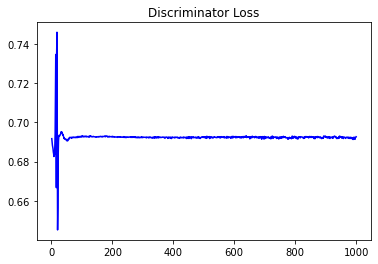

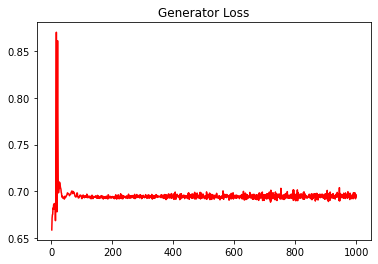

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3475256423295814


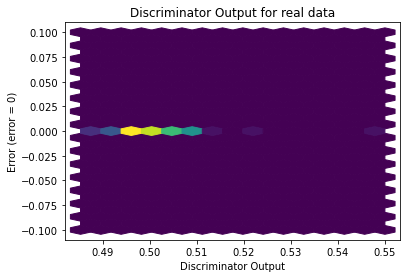

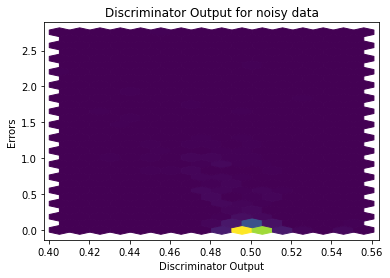

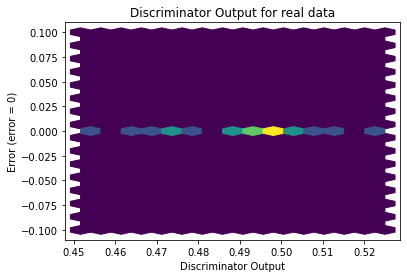

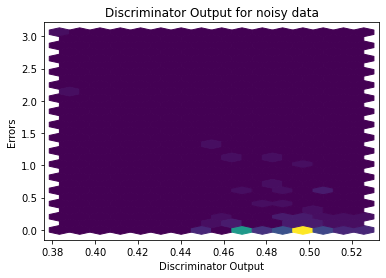

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


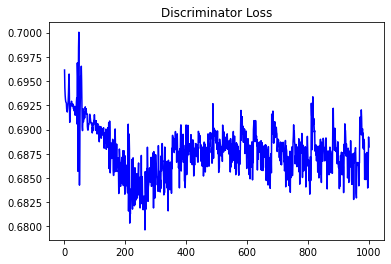

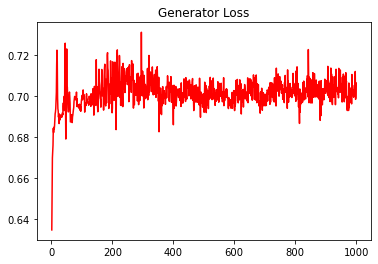

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.24637485673504186


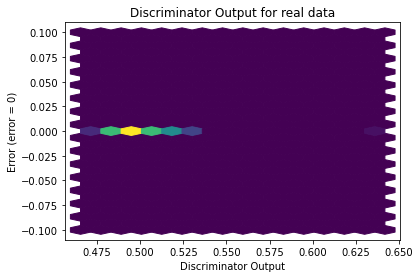

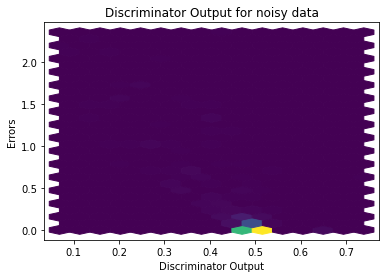

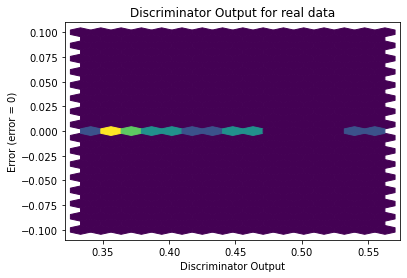

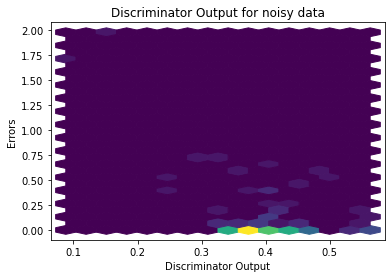

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2598]], requires_grad=True)
